In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import r2_score
# from sklearn.preprocessing import StandardScaler

### **Reading Data** 

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No          2.0                  3.0                   3.8   
1                 Yes          1.0                  2.0                   5.0   
2                 Yes          2.0                  NaN                   5.8   
3                 Yes          1.0                  1.0                   2.6   
4                  No          3.0                  7.0                   6.9   

   Burn Rate  
0       0.16  
1       0.36  
2       0.49  
3       0.20  
4       0.52

### **Data Investigation**

In [4]:
df.shape

(22750, 9)

In [5]:
df.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


- Date data type needs to be converted into from object to date

In [7]:
df.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [8]:
df.isnull().sum() / len(df) * 100

Employee ID             0.000000
Date of Joining         0.000000
Gender                  0.000000
Company Type            0.000000
WFH Setup Available     0.000000
Designation             0.000000
Resource Allocation     6.070330
Mental Fatigue Score    9.305495
Burn Rate               4.940659
dtype: float64

- Percentage of null values is small, So The best practice is imputation

### **Exploratoty Data Analysis (EDA)**

In [9]:
df.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No          2.0                  3.0                   3.8   
1                 Yes          1.0                  2.0                   5.0   
2                 Yes          2.0                  NaN                   5.8   
3                 Yes          1.0                  1.0                   2.6   
4                  No          3.0                  7.0                   6.9   

   Burn Rate  
0       0.16  
1       0.36  
2       0.49  
3       0.20  
4       0.52

In [464]:
avg = df['Burn Rate'].median()

In [407]:
female_count = df.Gender[(df.Gender == 'Female') & (df['Burn Rate'] > avg)].count()
female_count

4717

In [408]:
male_count = df.Gender[(df.Gender == 'Male') & (df['Burn Rate'] > avg)].count()
male_count

5956

In [409]:
fig = px.pie(df, values=[female_count, male_count], names=['Female', 'Male'], title='Percentage of Male and Female with Burn Rate Above The Average')
fig.show()

In [410]:
avail_count = df['WFH Setup Available'][(df['WFH Setup Available'] == 'Yes') & (df['Burn Rate'] > avg)].count()
non_avail_count = df['WFH Setup Available'][(df['WFH Setup Available'] == 'No') & (df['Burn Rate'] > avg)].count()

In [412]:
fig = px.bar(df, x=['Yes', 'No'], y=[avail_count, non_avail_count])
fig.show()

In [413]:
fig = px.pie(df, values=[avail_count, non_avail_count], names=['WFH Available', 'WFH Non-Available'], title='Impact of WFH Setup Availablility on Burn Rate')
fig.show()

In [525]:
median_burn_rate = df["Burn Rate"].median()

In [526]:
df["Burnout"] = df["Burn Rate"] > median_burn_rate

In [527]:
df.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No          2.0                  3.0                   3.8   
1                 Yes          1.0                  2.0                   5.0   
2                 Yes          2.0                  NaN                   5.8   
3                 Yes          1.0                  1.0                   2.6   
4                  No          3.0                  7.0                   6.9   

   Burn Rate  Burnout  
0       0.16    False  
1       0.36    False  
2       0.49     True  
3       0.20    False  
4       0.52     True

In [547]:
fig = px.bar(gender_counts, x="Burnout", y="Count", color="Gender", barmode="group",
             labels={"Gender": "Gender", "Count": "Count of Employees", "Burnout": "Burnout Status"},
             color_discrete_map={
                 'Female':'rgb(0,0,128)',
                 'Male':'rgb(235,207,52)'
             })
fig.update_layout(title="Gender-wise Distribution of Burnout Status")
fig.update_xaxes(labelalias=dict(true="Burnout", false="Non-burnout"))
fig.show()


0         9
1        11
2         3
3        11
4         7
         ..
22745    12
22746     1
22747    11
22748     1
22749     1
Name: Date of Joining, Length: 22750, dtype: int32

In [550]:
df['month']=    pd.to_datetime(df['Date of Joining']).dt.month

In [561]:
df[df.Burnout == True].groupby(['month', 'Burnout']).size().reset_index(name='Count')

month  Burnout  Count
0       1     True    867
1       2     True    876
2       3     True    900
3       4     True    865
4       5     True    886
5       6     True    883
6       7     True    872
7       8     True    907
8       9     True    942
9      10     True    926
10     11     True    864
11     12     True    885

In [560]:
len(df)

22750

In [551]:
df.head()

Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   
1      fffe3700360033003500      2008-11-30    Male      Service   
2  fffe31003300320037003900      2008-03-10  Female      Product   
3  fffe32003400380032003900      2008-11-03    Male      Service   
4  fffe31003900340031003600      2008-07-24  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No          2.0                  3.0                   3.8   
1                 Yes          1.0                  2.0                   5.0   
2                 Yes          2.0                  NaN                   5.8   
3                 Yes          1.0                  1.0                   2.6   
4                  No          3.0                  7.0                   6.9   

   Burn Rate  Burnout  month  
0       0.16    False      9  
1       0.36    False     11  
2       0.49     True      3  
3       0.20    False     11  
4       0.52     True      7

In [601]:
counts = round(((df[df.Burnout == True].groupby(['month', 'Burnout']).size().reset_index(name='Count').Count / len(df)) * 100), 1)
#counts = df[df.Burnout == True].groupby(['month', 'Burnout']).size().reset_index(name='Count').Count
counts

0     3.8
1     3.9
2     4.0
3     3.8
4     3.9
5     3.9
6     3.8
7     4.0
8     4.1
9     4.1
10    3.8
11    3.9
Name: Count, dtype: float64

In [580]:
sorted(df['month'].unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [613]:
fig = px.line(df, x=sorted(df['month'].unique()), y=counts)
fig.show()

In [57]:
fig = px.scatter(df, x="WFH Setup Available", y="Burn Rate")
fig.show()

In [615]:
fig = px.scatter(df, x="Mental Fatigue Score", y="Burn Rate", hover_name="Burn Rate", color='')
fig.show()

In [454]:
fig = px.scatter(df, x="Resource Allocation", y="Burn Rate", hover_name="Burn Rate")
fig.show()

In [76]:
fig = px.scatter(df, x="Mental Fatigue Score", y="Resource Allocation", hover_name="Burn Rate")
fig.show()

In [450]:
counts = df.groupby(by=["WFH Setup Available", "Burn Rate"]).size().reset_index(name="count")

In [453]:
px.bar(counts, x="WFH Setup Available", y="count", color="Burn Rate")

In [622]:
counts = df.groupby(by=["Designation", "Burnout"]).size().reset_index(name="count")
counts

Designation  Burnout  count
0           0.0    False   1507
1           1.0    False   4268
2           1.0     True    613
3           2.0    False   4292
4           2.0     True   3296
5           3.0    False   1872
6           3.0     True   4113
7           4.0    False    116
8           4.0     True   2275
9           5.0    False     22
10          5.0     True    376

In [629]:
fig = px.bar(counts, x="Designation", y="count", color='Burnout',color_discrete_map={
                 'Female':'rgb(0,0,128)',
                 'Male':'rgb(235,207,52)'
             })
fig.show()

In [431]:
counts = df.groupby(by=["Resource Allocation", "Burn Rate"]).size().reset_index(name="count")

In [432]:
px.bar(counts, x="Resource Allocation", y="count", color="Burn Rate")

In [419]:
counts = df.groupby(by=["Mental Fatigue Score", "Burn Rate"]).size().reset_index(name="count")

In [430]:
px.bar(counts, x="Mental Fatigue Score", y="count", color="Burn Rate")

### **Data Preprocessing**

In [465]:
df_copy = df.copy()

In [466]:
df_copy.head(1)

Employee ID Date of Joining  Gender Company Type  \
0  fffe32003000360033003200      2008-09-30  Female      Service   

  WFH Setup Available  Designation  Resource Allocation  Mental Fatigue Score  \
0                  No          2.0                  3.0                   3.8   

   Burn Rate  
0       0.16

- Handling Data Types (Date Column)
- Handling Null Values
- Handling Catigerical Encoding
- Drop Non Important Column To The Model

**Handling Data Types**

In [467]:
df_copy['Date of Joining'] = pd.to_datetime(df_copy['Date of Joining'])

In [468]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  float64       
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 1.6+ MB


**Handling Null Values**

- Try to know the distribution of columns with null values to determine the method of imputing these null values.

In [469]:
df.select_dtypes(include=[float]).iloc[:, 1:].head(1)

Resource Allocation  Mental Fatigue Score  Burn Rate
0                  3.0                   3.8       0.16

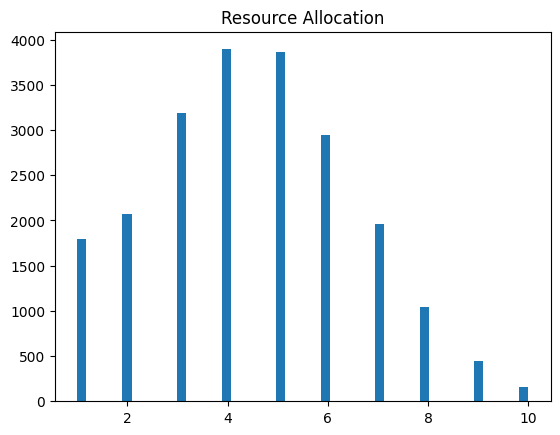

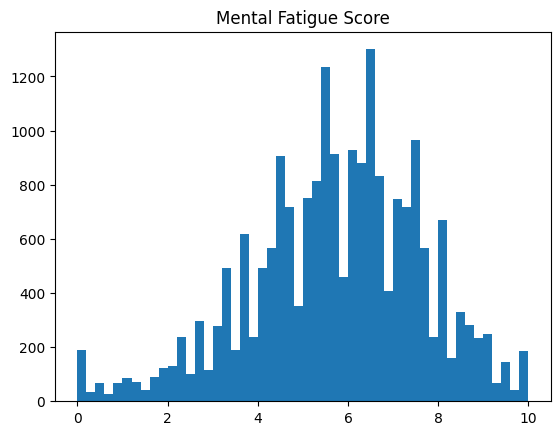

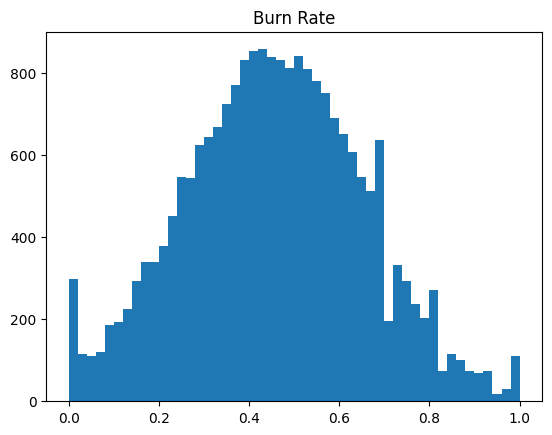

In [470]:
for c in df.select_dtypes(include=[float]).iloc[:, 1:]:
    plt.title(c)
    plt.hist(df[c], bins=50)
    plt.show()

In [471]:
df_copy['Resource Allocation'] = df_copy['Resource Allocation'].fillna(df_copy['Resource Allocation'].median())

In [472]:
df_copy['Mental Fatigue Score'] = df_copy['Mental Fatigue Score'].fillna(df_copy['Mental Fatigue Score'].median())

In [473]:
df_copy.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation        0
Mental Fatigue Score       0
Burn Rate               1124
dtype: int64

**Handling Catigerical Fearures**

In [474]:
df_copy.Gender.unique(), df_copy['Company Type'].unique(), df['WFH Setup Available'].unique()

(array(['Female', 'Male'], dtype=object),
 array(['Service', 'Product'], dtype=object),
 array(['No', 'Yes'], dtype=object))

In [475]:
encode = df_copy.select_dtypes(include=[object]).columns
encode

Index(['Employee ID', 'Gender', 'Company Type', 'WFH Setup Available'], dtype='object')

In [476]:
for col in encode:
    df_copy[col] = LabelEncoder().fit_transform(df_copy[col])

In [477]:
df_copy.head()

Employee ID Date of Joining  Gender  Company Type  WFH Setup Available  \
0         7722      2008-09-30       0             1                    0   
1        21062      2008-11-30       1             1                    1   
2         2381      2008-03-10       0             0                    1   
3        10790      2008-11-03       1             1                    1   
4         6810      2008-07-24       0             1                    0   

   Designation  Resource Allocation  Mental Fatigue Score  Burn Rate  
0          2.0                  3.0                   3.8       0.16  
1          1.0                  2.0                   5.0       0.36  
2          2.0                  4.0                   5.8       0.49  
3          1.0                  1.0                   2.6       0.20  
4          3.0                  7.0                   6.9       0.52

Gender
   - Female => 0
   - Male => 1

Company Type:
   - Product => 0
   - Service => 1
    
WFH Setup Available:
   - No => 0
   - Yes => 1

**Insights**

In [478]:
corr = df_copy.corr()

In [479]:
corr

Employee ID  Date of Joining    Gender  Company Type  \
Employee ID              1.000000         0.007428  0.010647     -0.004083   
Date of Joining          0.007428         1.000000 -0.000093     -0.000237   
Gender                   0.010647        -0.000093  1.000000     -0.009789   
Company Type            -0.004083        -0.000237 -0.009789      1.000000   
WFH Setup Available      0.005423        -0.004144 -0.073296      0.005725   
Designation             -0.008586        -0.000930  0.113295      0.006095   
Resource Allocation     -0.007244        -0.000612  0.138321      0.006263   
Mental Fatigue Score    -0.011804         0.002255  0.138519      0.002347   
Burn Rate               -0.012860        -0.001358  0.154895      0.004281   

                      WFH Setup Available  Designation  Resource Allocation  \
Employee ID                      0.005423    -0.008586            -0.007244   
Date of Joining                 -0.004144    -0.000930            -0.000612   
Gender                          -0.073296     0.113295             0.138321   
Company Type                     0.005725     0.006095             0.006263   
WFH Setup Available              1.000000    -0.229720            -0.275692   
Designation                     -0.229720     1.000000             0.850656   
Resource Allocation             -0.275692     0.850656             1.000000   
Mental Fatigue Score            -0.263203     0.656316             0.737823   
Burn Rate                       -0.306266     0.737556             0.829632   

                      Mental Fatigue Score  Burn Rate  
Employee ID                      -0.011804  -0.012860  
Date of Joining                   0.002255  -0.001358  
Gender                            0.138519   0.154895  
Company Type                      0.002347   0.004281  
WFH Setup Available              -0.263203  -0.306266  
Designation                       0.656316   0.737556  
Resource Allocation               0.737823   0.829632  
Mental Fatigue Score              1.000000   0.898926  
Burn Rate                         0.898926   1.000000

<Axes: >

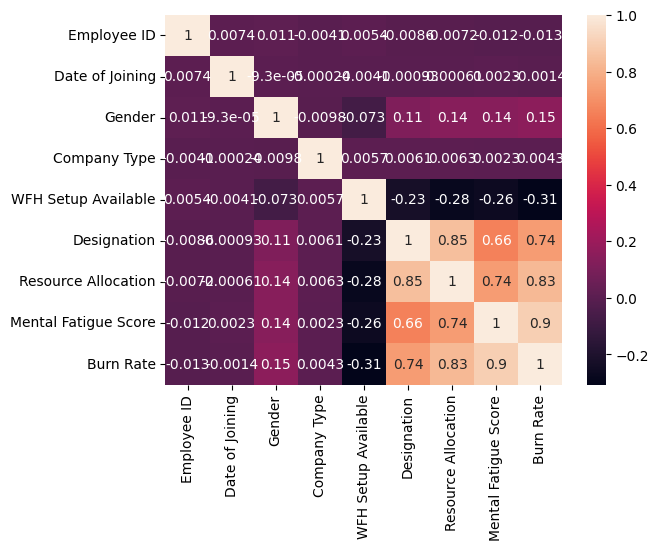

In [480]:
sns.heatmap(corr, annot=True)

In [481]:
df_copy['Burn Rate'].median(), df_copy['Burn Rate'].max(), df_copy['Burn Rate'].min()

(0.45, 1.0, 0.0)

In [482]:
df_copy['Mental Fatigue Score'].median(), df_copy['Mental Fatigue Score'].max(), df_copy['Mental Fatigue Score'].min()

(5.9, 10.0, 0.0)

In [483]:
df_copy['Mental Fatigue Score'][df_copy['Burn Rate'].isnull()]

45       5.9
47       5.9
52       5.1
91       3.8
122      5.9
        ... 
22699    6.1
22706    6.3
22711    5.4
22733    4.5
22741    6.0
Name: Mental Fatigue Score, Length: 1124, dtype: float64

**Handling Non Important Features**

In [484]:
df_copy = df_copy.drop(['Employee ID', 'Date of Joining', 'Company Type'], axis=1)

In [485]:
df_copy.head(1)

Gender  WFH Setup Available  Designation  Resource Allocation  \
0       0                    0          2.0                  3.0   

   Mental Fatigue Score  Burn Rate  
0                   3.8       0.16

### **Train The Model**

In [486]:
data = df_copy[df_copy['Burn Rate'].notna()]

In [487]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21626 entries, 0 to 22749
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                21626 non-null  int32  
 1   WFH Setup Available   21626 non-null  int32  
 2   Designation           21626 non-null  float64
 3   Resource Allocation   21626 non-null  float64
 4   Mental Fatigue Score  21626 non-null  float64
 5   Burn Rate             21626 non-null  float64
dtypes: float64(4), int32(2)
memory usage: 1013.7 KB


In [488]:
data.isnull().sum()

Gender                  0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [489]:
x = np.array(data.drop(['Burn Rate'], axis=1))
y = np.array(data['Burn Rate'])

In [490]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [491]:
lr = LinearRegression().fit(x_train, y_train)

In [492]:
y_pred = lr.predict(x_test)

In [493]:
r2_score(y_test, y_pred)

0.8694666260440838

In [494]:
obs = x_test[8].reshape(1, -1)
obs

array([[0. , 1. , 1. , 3. , 5.9]])

In [495]:
y_test[8]

0.41

In [496]:
lr.predict(obs)

array([0.39517287])

**Try Non Seen Data**

In [497]:
lr.predict(np.array([[1. , 1. , 3. , 7. , 9]]))

array([0.75204404])

**Load The Model**

In [521]:
import pickle

saved_model = "model.pkl"

with open(saved_model, 'wb') as file:
    pickle.dump(lr, file)

In [522]:
with open(saved_model, 'rb') as file:
    lr_model = pickle.load(file)
print(lr_model)

LinearRegression()


In [523]:
lr_model.predict(obs)[0]

0.39517286959512904